Students Performance in Exams



In [1]:
# Se inicia con las importaciones de paquetes necesarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leeremos el Dataset desde el archivo .csv desgargado con el link provisto en el email del challenge de Universiddad Siglo 21

In [3]:
df = pd.read_csv("StudentsPerformance.csv")


In [4]:
# Parte 1: Análisis y Preparación de Datos

In [4]:
## Análisis Exploratorio de Datos AED o EDA

In [5]:
# Visualizo el dataset
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
# Ver los nombres de las columnas:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
# Observar las métricas generales del dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.shape

(1000, 8)

In [10]:
# Luego de observar los tipos de valores de todas las columnas, deseamos ver aquellas columnas que tienen variables Categóricas es decir, nó numéricas, ya que más adelante requerirán un tratamiento diferente


In [11]:
categorical_cols = df.select_dtypes(include='object').columns

In [12]:
categorical_cols

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [13]:
# Dentro de las columnas con variables Categóricas, buscamos ver los valores únicos que toman dichas variables para cada columna
# De allí que realizamos un loop iterando dentro del listado de columnas categóricas y para cada columna observamos sus valores únicos o diferentes

for i in categorical_cols:
    print(df[i].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [14]:
# Pre-Procesamiento de Datos:

In [15]:
# Manejo de valores faltantes

In [16]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [17]:
# No hay valores faltantes ni nulos por lo que no hace falta mayor limpieza de datos

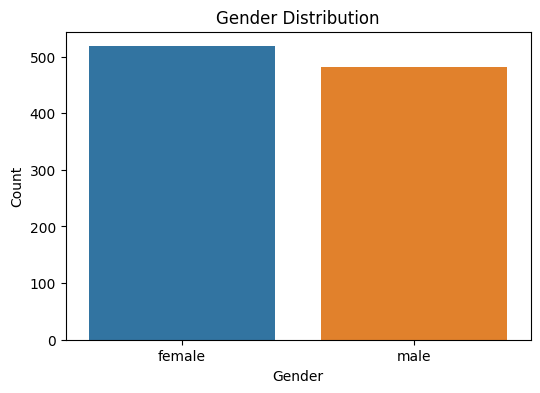

In [18]:
# Visualizar la cantidad de hombres y mujeres dentro de la columna de género gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



In [19]:
# Busco ver la cantidad de estudiantes que completaron cursos preparatorios
count_test = df['test preparation course'].value_counts()
count_test

none         642
completed    358
Name: test preparation course, dtype: int64

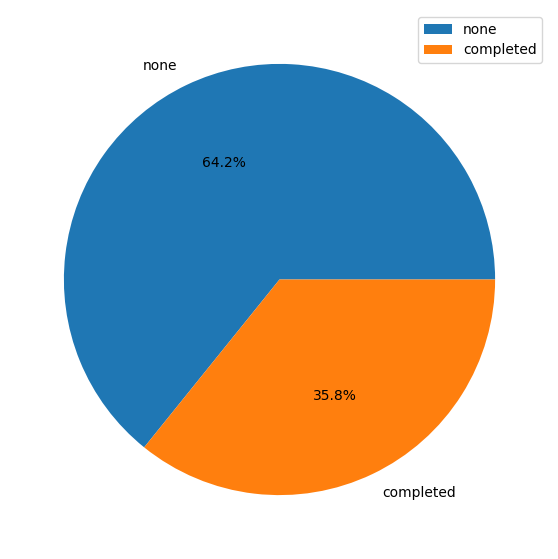

In [20]:
# Visualizar como Gráfico de torta
labels = df['test preparation course'].value_counts().index
plt.figure(figsize= (7,7))
plt.pie(count_test,labels=labels,autopct='%1.1f%%')
plt.legend(labels)
plt.show()

In [21]:
# Creo una nueva columna en el dataframe que sea el promedio de las puntuaciones en las 3 materias

df['average_score']=(df['math score']+df['reading score']+df['writing score'])/3

In [22]:
# Veo como queda el dataframe con la nueva columna
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


<Axes: xlabel='average_score', ylabel='math score'>

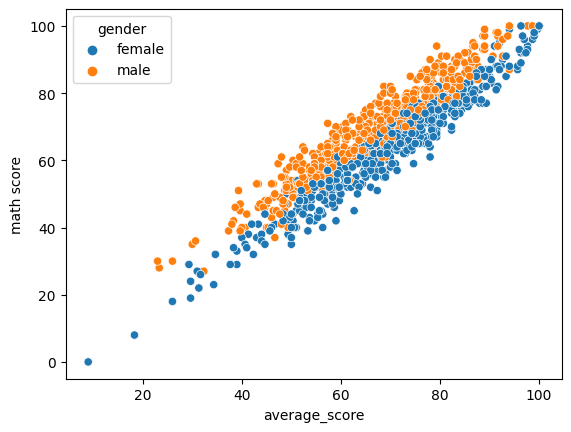

In [23]:
# Exploramos la relación entre la nota promedio y la nota en matemáticas
sns.scatterplot(x=df['average_score'],y=df['math score'],hue=df['gender'])

<Axes: xlabel='average_score', ylabel='reading score'>

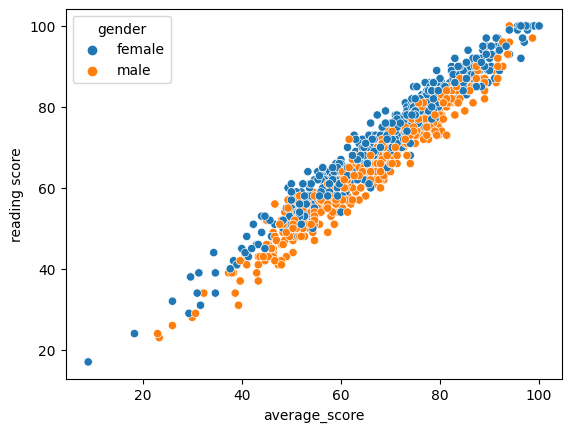

In [24]:
# lo mismo para lectura
sns.scatterplot(x=df['average_score'],y=df['reading score'],hue=df['gender'])

<ipython-input-26-3d1a0ac1fa38>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


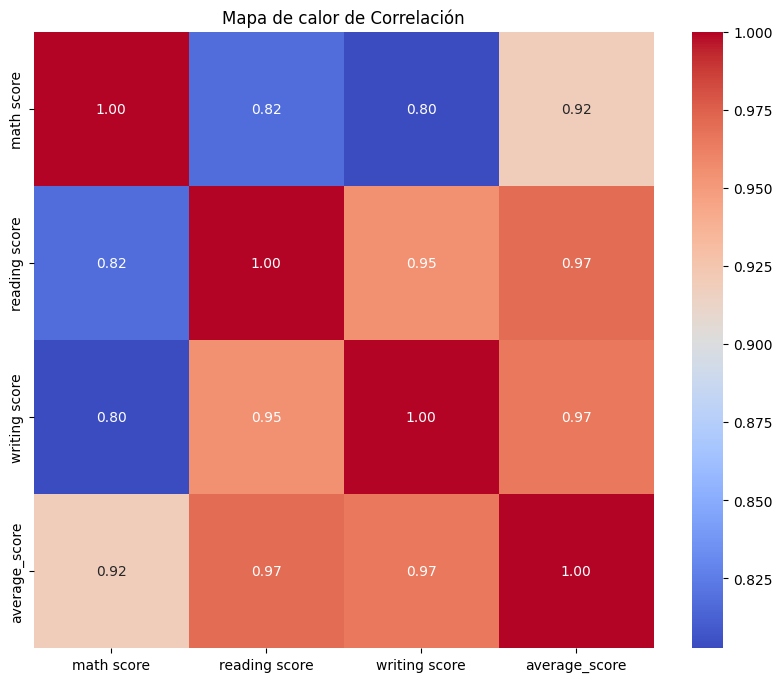

In [26]:
# Crear Matríz de Correlación para ver la influencia mutua entre las variables numéricas

correlation_matrix = df.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de Correlación')
plt.show()

In [27]:
# Explorar las relaciones entre el promedio de notas y otras variables
# 1. Género
avg_score_by_gender = df.groupby('gender')['average_score'].mean()

# 2. Nivel de educación de los padres
avg_score_by_parent_education = df.groupby('parental level of education')['average_score'].mean().sort_values()

# 3. Curso de preparación para la prueba
avg_score_by_test_prep = df.groupby('test preparation course')['average_score'].mean()

# 4. Raza/etnicidad
avg_score_by_race = df.groupby('race/ethnicity')['average_score'].mean().sort_values()

# 5. Tipo de almuerzo
avg_score_by_lunch = df.groupby('lunch')['average_score'].mean()

# Imprimir los resultados
print("Promedio General por género:", avg_score_by_gender)
print("Promedio General por nivel de educación de los padres:", avg_score_by_parent_education)
print("Promedio General por curso de preparación para la prueba:", avg_score_by_test_prep)
print("Promedio General por raza/etnicidad:", avg_score_by_race)
print("Promedio General por tipo de almuerzo:", avg_score_by_lunch)


Promedio General por género: gender
female    69.569498
male      65.837483
Name: average_score, dtype: float64
Promedio General por nivel de educación de los padres: parental level of education
high school           63.096939
some high school      65.108007
some college          68.476401
associate's degree    69.569069
bachelor's degree     71.923729
master's degree       73.598870
Name: average_score, dtype: float64
Promedio General por curso de preparación para la prueba: test preparation course
completed    72.669460
none         65.038941
Name: average_score, dtype: float64
Promedio General por raza/etnicidad: race/ethnicity
group A    62.992509
group B    65.468421
group C    67.131661
group D    69.179389
group E    72.752381
Name: average_score, dtype: float64
Promedio General por tipo de almuerzo: lunch
free/reduced    62.199061
standard        70.837209
Name: average_score, dtype: float64


In [28]:
# Graficar estas relaciones

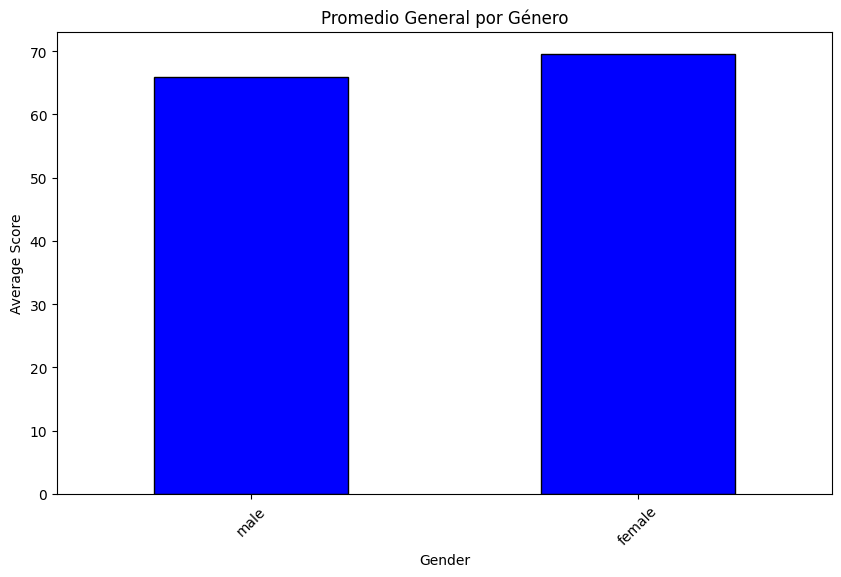

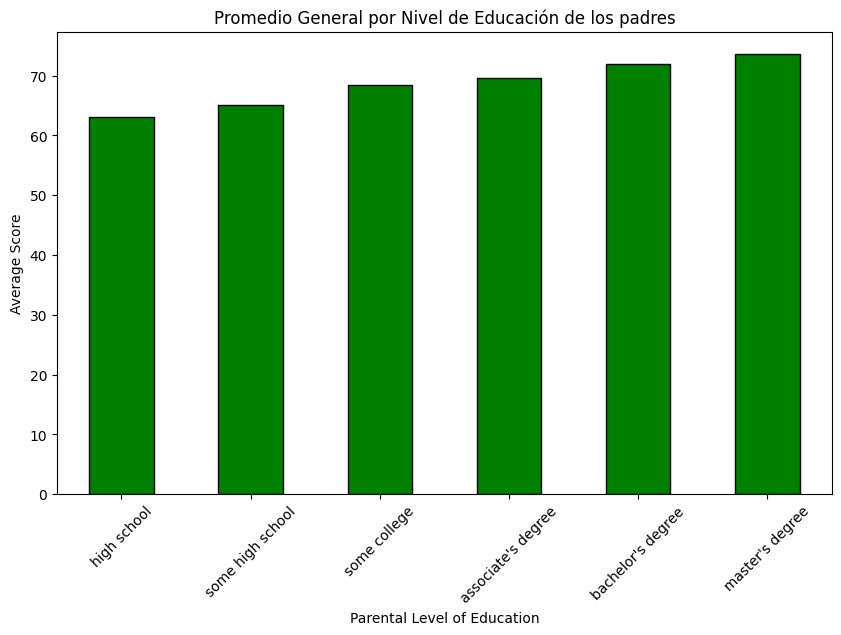

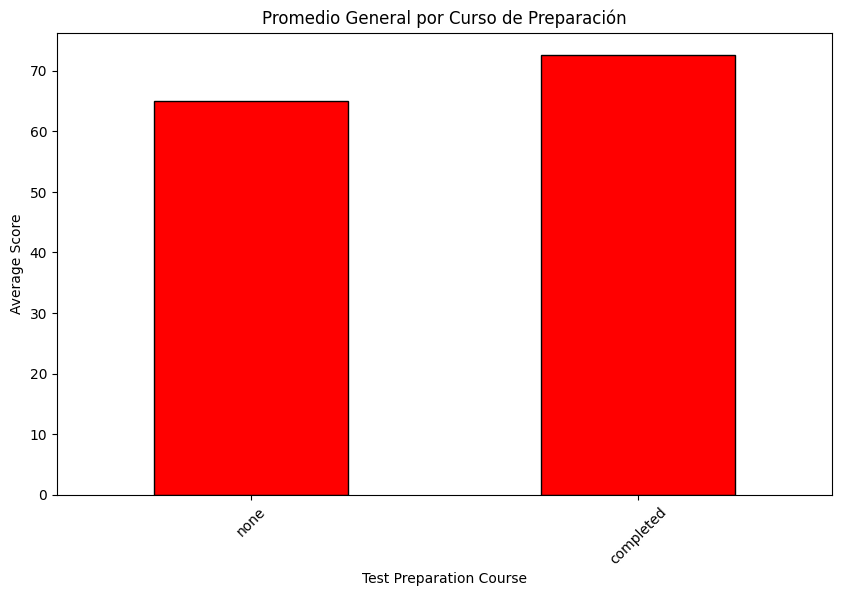

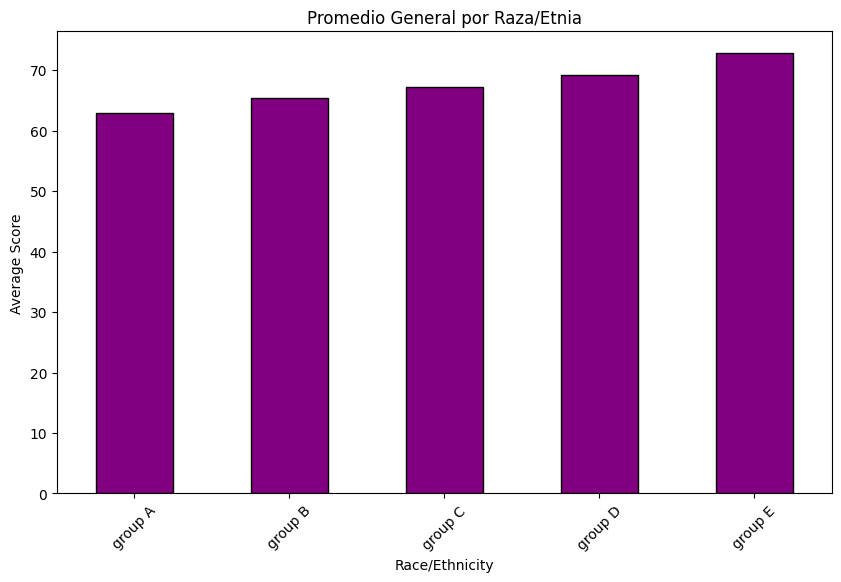

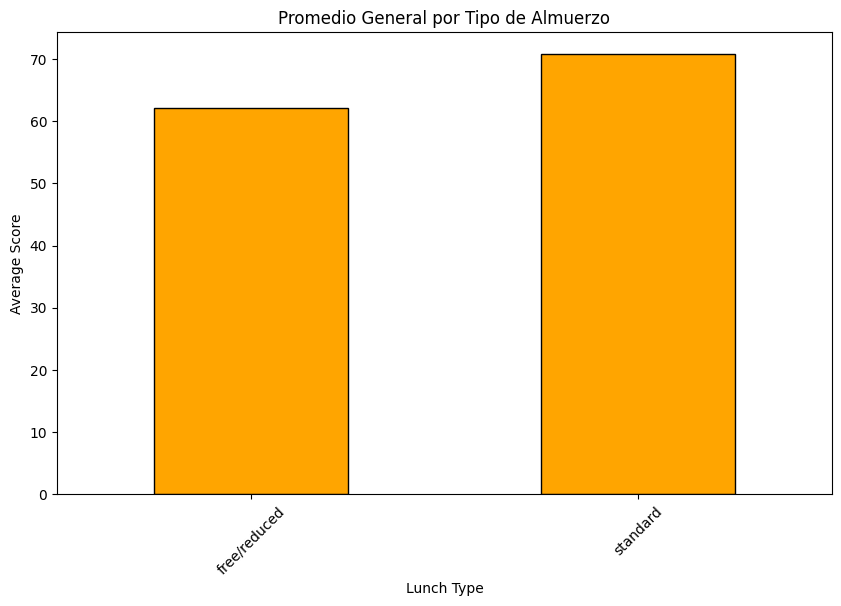

In [29]:
# Creo una función que grafique los promedios por cada categoría y luego la aplico en cada columna

def plot_avg_score_by_category(avg_score_series, title, xlabel, color, ylabel='Average Score'):
    plt.figure(figsize=(10, 6))
    avg_score_series.sort_values().plot(kind='bar', color=color, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

# Generando Gráficos de barras por categorías
plot_avg_score_by_category(avg_score_by_gender, 'Promedio General por Género', 'Gender', 'blue')
plot_avg_score_by_category(avg_score_by_parent_education, 'Promedio General por Nivel de Educación de los padres', 'Parental Level of Education', 'green')
plot_avg_score_by_category(avg_score_by_test_prep, 'Promedio General por Curso de Preparación', 'Test Preparation Course', 'red')
plot_avg_score_by_category(avg_score_by_race, 'Promedio General por Raza/Etnia', 'Race/Ethnicity', 'purple')
plot_avg_score_by_category(avg_score_by_lunch, 'Promedio General por Tipo de Almuerzo', 'Lunch Type', 'orange')


In [30]:
# Algunas conclusiones:
"""
Género (Gender): Parece que las mujeres tienden a tener un promedio general más alto que los hombres.
Raza/Etnia (Race/Ethnicity): Hay algunas diferencias en los promedios generales entre los distintos grupos, aunque no son muy pronunciadas ni significativas.
Nivel Educativo de los Padres (Parental Level of Education): Los estudiantes cuyos padres tienen un grado de máster tienden a tener promedios generales más altos; y a su vez mientras mayor es el nivel de educación general de los padres, el promedio es mayor.
Tipo de Almuerzo (Lunch): Los estudiantes con almuerzo estándar tienden a tener un promedio general más alto.
Curso de Preparación para el Examen (Test Preparation Course): Los estudiantes que completaron un curso de preparación tienden a tener un promedio general más alto.
"""

'\nGénero (Gender): Parece que las mujeres tienden a tener un promedio general más alto que los hombres.\nRaza/Etnia (Race/Ethnicity): Hay algunas diferencias en los promedios generales entre los distintos grupos, aunque no son muy pronunciadas ni significativas.\nNivel Educativo de los Padres (Parental Level of Education): Los estudiantes cuyos padres tienen un grado de máster tienden a tener promedios generales más altos; y a su vez mientras mayor es el nivel de educación general de los padres, el promedio es mayor.\nTipo de Almuerzo (Lunch): Los estudiantes con almuerzo estándar tienden a tener un promedio general más alto.\nCurso de Preparación para el Examen (Test Preparation Course): Los estudiantes que completaron un curso de preparación tienden a tener un promedio general más alto.\n'

In [31]:
# Feature Engineering
# Label Encoding de las columnas categoricas para no hacer 1-Hot Encoding y añadir más columnas al dataframe que tengan colinealidad entre ellas

In [32]:
# Creo diccionarios para mapear las columnas categóricas y convertirlas a numéricas
gender = {
    'male':1,
    'female':0
}

In [33]:
race = {
    'group A':0,
    'group B':1,
    'group C':2,
    'group D':3,
    'group E':4
}

In [34]:
# Reemplazo las columnas gender y race por sus mapeos en label encoding
df['gender']=df['gender'].map(gender)
df['race/ethnicity']=df['race/ethnicity'].map(race)

In [35]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,bachelor's degree,standard,none,72,72,74,72.666667
1,0,2,some college,standard,completed,69,90,88,82.333333
2,0,1,master's degree,standard,none,90,95,93,92.666667
3,1,0,associate's degree,free/reduced,none,47,57,44,49.333333
4,1,2,some college,standard,none,76,78,75,76.333333


In [36]:
# Hago el mismo tipo de mapeo y label encoding para el nivel de educacion de los padres
level = {
    "bachelor's degree":0,
    'some college':1,
    "master's degree":2,
    "associate's degree":3,
    "high school":4,
    "some high school":5
}

In [37]:
df['parental level of education']=df['parental level of education'].map(level)

In [38]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,0,standard,none,72,72,74,72.666667
1,0,2,1,standard,completed,69,90,88,82.333333
2,0,1,2,standard,none,90,95,93,92.666667
3,1,0,3,free/reduced,none,47,57,44,49.333333
4,1,2,1,standard,none,76,78,75,76.333333


In [39]:
df = pd.get_dummies(df,drop_first=True)

In [40]:
""" La función pd.get_dummies() se utiliza para convertir variables categóricas en un formato que sea más fácil de proporcionar a modelos de machine learning. Esta función crea una nueva columna por cada valor único en la columna original y asigna un 1 o un 0 (dummy variables) para cada registro, dependiendo de si el registro tiene ese valor o no.

El parámetro drop_first=True se utiliza para evitar la multicolinealidad, que es un problema común en estadísticas cuando se tienen variables altamente correlacionadas. Al establecer drop_first=True, la primera columna "dummy" se eliminará, asegurando que solo se creen
�
−
1
n−1 columnas "dummy" para una columna original con
�
n categorías únicas. Esto es especialmente útil en modelos de regresión lineal y otros algoritmos que son sensibles a la multicolinealidad.

"""

' La función pd.get_dummies() se utiliza para convertir variables categóricas en un formato que sea más fácil de proporcionar a modelos de machine learning. Esta función crea una nueva columna por cada valor único en la columna original y asigna un 1 o un 0 (dummy variables) para cada registro, dependiendo de si el registro tiene ese valor o no.\n\nEl parámetro drop_first=True se utiliza para evitar la multicolinealidad, que es un problema común en estadísticas cuando se tienen variables altamente correlacionadas. Al establecer drop_first=True, la primera columna "dummy" se eliminará, asegurando que solo se creen \n�\n−\n1\nn−1 columnas "dummy" para una columna original con \n�\nn categorías únicas. Esto es especialmente útil en modelos de regresión lineal y otros algoritmos que son sensibles a la multicolinealidad.\n\n'

In [41]:
df.head()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,average_score,lunch_standard,test preparation course_none
0,0,1,0,72,72,74,72.666667,1,1
1,0,2,1,69,90,88,82.333333,1,0
2,0,1,2,90,95,93,92.666667,1,1
3,1,0,3,47,57,44,49.333333,0,1
4,1,2,1,76,78,75,76.333333,1,1


In [42]:
# Parte 2:Construcción de Modelo de Machine Learning:
# Modelo de regresión:
"""Vamos a buscar predecir el promedio general en función de el resto de ariables. Si bien al colocar las 3 notas, el modelo dará un resultado casi exacto con mucha facilidad, el hecho de no colocar alguna de las notas o ninguna de ellas, haría un modelo con un nivel de predicción muy pobre. Por ello lo haremos y luego corroboraremos que no tenga overfitting.
"""

'Vamos a buscar predecir el promedio general en función de el resto de ariables. Si bien al colocar las 3 notas, el modelo dará un resultado casi exacto con mucha facilidad, el hecho de no colocar alguna de las notas o ninguna de ellas, haría un modelo con un nivel de predicción muy pobre. Por ello lo haremos y luego corroboraremos que no tenga overfitting.\n'

In [43]:
# Separamos el conjunto de Variables Independients X que serán utilizadas como variables predictora de la variable Y que es la variable a predecir

In [44]:
# Dataframe x de variables independientes, todascexcepto el promedio
x = df.drop(columns='average_score').values

In [45]:
# Ver el dataframe de las variables predictoras
x

array([[ 0,  1,  0, ..., 74,  1,  1],
       [ 0,  2,  1, ..., 88,  1,  0],
       [ 0,  1,  2, ..., 93,  1,  1],
       ...,
       [ 0,  2,  4, ..., 65,  0,  0],
       [ 0,  3,  1, ..., 77,  1,  0],
       [ 0,  3,  1, ..., 86,  0,  1]])

In [46]:
x[0]

array([ 0,  1,  0, 72, 72, 74,  1,  1])

In [47]:
# La columna o array de valores tipo target o variable dependiente
y = df['average_score'].values

In [48]:
# Ver array de valores dependientes
y

array([ 72.66666667,  82.33333333,  92.66666667,  49.33333333,
        76.33333333,  77.33333333,  91.66666667,  40.66666667,
        65.        ,  49.33333333,  54.66666667,  45.        ,
        73.        ,  73.33333333,  53.66666667,  74.        ,
        87.66666667,  26.        ,  44.66666667,  57.66666667,
        66.        ,  70.        ,  50.33333333,  71.66666667,
        75.        ,  73.        ,  59.33333333,  70.33333333,
        68.33333333,  69.        ,  72.33333333,  63.        ,
        64.33333333,  40.        ,  88.66666667,  80.33333333,
        79.33333333,  57.66666667,  84.33333333,  56.66666667,
        56.66666667,  66.33333333,  58.66666667,  63.33333333,
        53.33333333,  58.66666667,  60.66666667,  71.        ,
        69.        ,  82.66666667,  52.        ,  71.33333333,
        46.33333333,  80.33333333,  80.66666667,  39.        ,
        84.33333333,  52.        ,  58.33333333,   9.        ,
        75.        ,  37.33333333,  59.33333333,  73.33

In [49]:
# División entre datos de Entrenamiento y de Testeo

from sklearn.model_selection import train_test_split

In [50]:
# Se realiza la división con un 75% de datos para train y 25% para test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [51]:
# Seleccionamos como modelo de Regresión para predecir el promedio de notas o average_score al modelo Random Forest de Regresión

from sklearn.ensemble import RandomForestRegressor

In [52]:
# Inicializamos el modelo
model=RandomForestRegressor()

In [53]:
# Entrenamos el modelo ajustandolo a los datos de entrenamiento
model.fit(x_train,y_train)

RandomForestRegressor()

In [54]:
# Predicciones:
# Se pasa al modelo los datos separados para prueba que no vió en el entrenamiento y se predice el valor del average_score o promedio de notas

predictions = model.predict(x_test)

In [55]:
# Veamos las predicciones
predictions

array([68.98333333, 77.18      , 45.03666667, 68.06666667, 74.22      ,
       72.82333333, 70.22333333, 43.61666667, 86.96333333, 37.32666667,
       51.68333333, 64.18666667, 81.96666667, 80.91      , 53.99      ,
       39.84666667, 53.02333333, 86.30333333, 53.46333333, 79.62666667,
       63.05      , 55.45      , 76.43333333, 60.95666667, 47.79      ,
       64.55333333, 58.95      , 48.84666667, 62.99333333, 81.78666667,
       79.50333333, 88.99666667, 89.31      , 56.31333333, 54.67      ,
       83.34      , 97.11333333, 59.10666667, 71.86      , 72.13666667,
       68.6       , 56.83      , 70.35333333, 72.13666667, 78.36333333,
       58.16333333, 85.16666667, 61.57666667, 83.83      , 58.09      ,
       37.69666667, 62.55333333, 49.23      , 57.26333333, 40.04      ,
       70.43666667, 52.50333333, 64.62333333, 78.21333333, 60.86666667,
       67.69666667, 77.32333333, 50.13      , 71.52333333, 65.75666667,
       64.65333333, 71.65333333, 51.55666667, 66.99666667, 55.29

In [56]:
# Evaluación del modelo:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [60]:
# Visualizar el valor de R2 que es una métrica de evaluación muy importante
r2_score(y_test,predictions)


0.997174318328833

In [62]:
""" Podría parecer un valor demasiado alto y el modelo podría estar sufriendo overfitting, pero en realidad el valor del promedio general es muy simple de predecir disponiendo de las 3 notas que componen el promedio para un modelo de regresión lineal. De todos modos luego haremos un análisis de Validación cruzada para asegurarnos de la veracidad del resultado"""

' Podría parecer un valor demasiado alto y el modelo podría estar sufriendo overfitting, pero en realidad el valor del promedio general es muy simple de predecir disponiendo de las 3 notas que componen el promedio para un modelo de regresión lineal. De todos modos luego haremos un análisis de Validación cruzada para asegurarnos de la veracidad del resultado'

In [63]:
mse = mean_squared_error(y_test,predictions)

In [64]:
rmse = sqrt(mse)

In [65]:
rmse

0.7395318939857995

In [66]:
""" Este valor de rmse implica que el error en el promedio calculado por alumno puede tener un error promedio de solo 0.7 puntos en 100. Por lo que la precisión es altísima."""

' Este valor de rmse implica que el error en el promedio calculado por alumno puede tener un error promedio de solo 0.7 puntos en 100. Por lo que la precisión es altísima.'

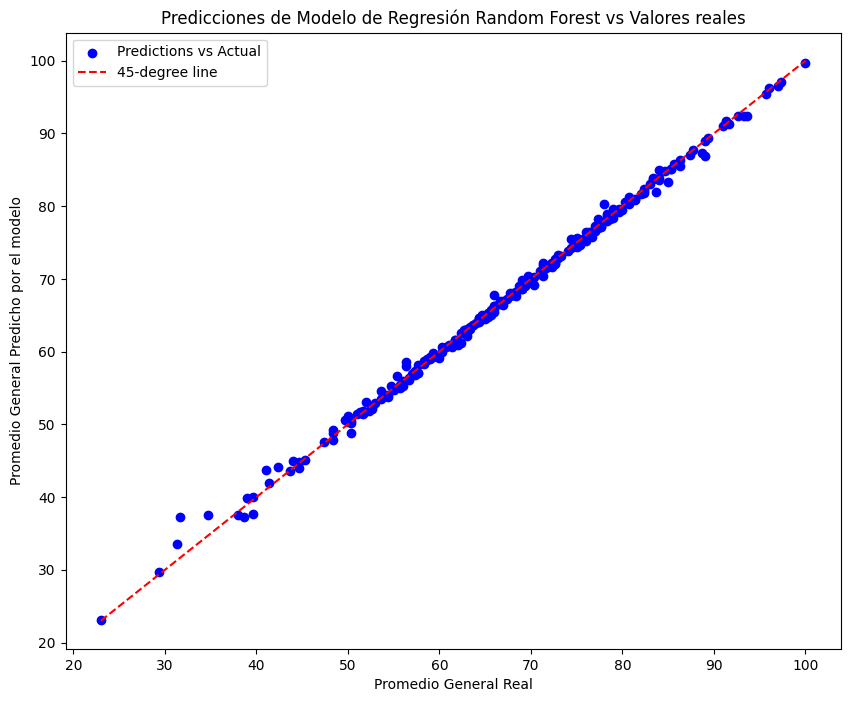

In [67]:

#y_test = np.array([70, 85, 78, 92, 88, 76, 84, 90])
# Predictions = np.array([68, 84, 80, 89, 87, 75, 82, 91])

plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, c='blue', label='Predictions vs Actual')
plt.xlabel('Promedio General Real')
plt.ylabel('Promedio General Predicho por el modelo')

max_value = max(max(y_test), max(predictions))
min_value = min(min(y_test), min(predictions))
plt.plot([min_value, max_value], [min_value, max_value], 'r--', label='45-degree line')

# Add title and legend
plt.title('Predicciones de Modelo de Regresión Random Forest vs Valores reales')
plt.legend()

plt.show()


In [68]:
# Luego de analizar los resultados del modelo, se procede a realizar una verificación del modelo por medio de un Cross Validation

In [69]:
""" Validación Cruzada:"""

' Validación Cruzada:'

In [70]:
# Importing necessary libraries for K-Folds Cross-Validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np


rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Se realiza una validación cruzada con k pliegues en este caso elegimos k= 5 pliegues en todo el conjunto de datos x e y
cv_scores = cross_val_score(rf, x, y, cv=5, scoring='r2')

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

cv_mean, cv_std


(0.9965566511923585, 0.0010454876567431808)

In [71]:
"""CONCLUSION:
El modelo de regresión da un valor muy alto de r2 pero luego, la hacer una validación cruzada y obtener un valor igualmente alto y cercano a 1, esto implica que en todo el conjunto de datos el modelo se comporta excepcionalmente bien y no tiene overfitting; de lo cual que el modelo arroja resultados muy precisos por la simlicidad de su valor a predecir."""

'CONCLUSION:\nEl modelo de regresión da un valor muy alto de r2 pero luego, la hacer una validación cruzada y obtener un valor igualmente alto y cercano a 1, esto implica que en todo el conjunto de datos el modelo se comporta excepcionalmente bien y no tiene overfitting; de lo cual que el modelo arroja resultados muy precisos por la simlicidad de su valor a predecir.'

In [72]:
# Guardar el modelo en formato pickle para ser reutilizado cuando se desee

In [84]:
import pickle
pickle.dump(model,open('students_model.pkl','wb'))